[적응형 스레시홀드 적용]

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
blk_size = 9		# 블록 사이즈
C = 5				# 차감 상수
img = cv2.imread('../data/img/img/sudoku.png', cv2.IMREAD_GRAYSCALE)	# 그레이 스케일로 읽기

In [4]:
# 오츠의 알고리즘으로 단일 경게 값을 전체 이미지에 적용
ret, th1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)	

In [5]:
# 적응형 스레스홀드를 평균과 가우시안 분포로 각각 적용
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,\
							cv2.THRESH_BINARY, blk_size, C)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
							cv2.THRESH_BINARY, blk_size, C)

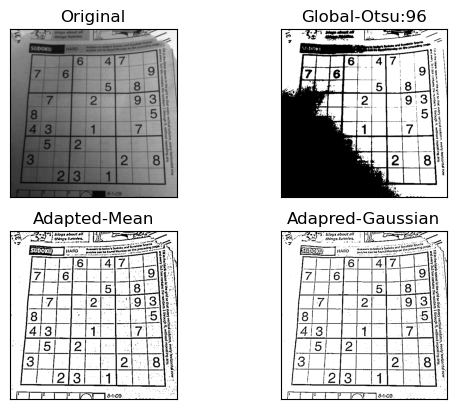

In [6]:
# 결과를 Matplot으로 출력
imgs = {'Original': img, 'Global-Otsu:%d'%ret:th1, \
		'Adapted-Mean':th2, 'Adapred-Gaussian': th3}
for i, (k, v) in enumerate(imgs.items()):
	plt.subplot(2,2,i+1)
	plt.title(k)
	plt.imshow(v,'gray')
	plt.xticks([]), plt.yticks([])

plt.show()